In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import backend
import time

In [14]:

def _x(t,data):
    return 0 if t < 0 else data[t]

def x(t,data):
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    return _x(t-1,data) + (beta*_x(t-tau-1,data))/(1+_x(t-tau-1,data)**n) - gamma*_x(t-1,data)

def mackey_glass_generator():


    N = 2000

    data = np.zeros(N)
    data[0] = 1.5

    for t in range(1,N):
        data[t] = x(t,data)

    return data
def get_train_test_data(x,addNoise=1,sigma=1):
    train_set = np.zeros([1000,5])
    train_labels = np.zeros([1000])
    
    for t in range(300,1300):
        train_set[t-300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        train_labels[t-300] = x[t+5] 

    test_set = np.zeros([200,5])
    test_labels = np.zeros([200])
    
    for t in range(1300,1500):
        test_set[t-1300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        test_labels[t-1300] = x[t+5] 
        
    if addNoise:
        noise = np.random.normal(0,sigma,train_set.shape)
        train_set = train_set+noise
        
    return train_set, train_labels, test_set, test_labels

def init_network(num_nodes, lambd):
    if len(num_nodes) < 1:
        return None

    model = Sequential()

    num_layers = len(num_nodes)
    model.add(Dense(num_nodes[0], input_dim=5, kernel_initializer='normal', activation='relu',use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    for i in range(1, num_layers):
        model.add(Dense(num_nodes[i], kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    model.add(Dense(1, kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    #not sparse data so we use L2 reg
    model.summary()
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='mse',metrics=['MSE'])
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.001, patience=100)
    return model, es

Nodes hidden layer1:  5
Nodes hidden layer2:  1
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


/home/karsten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 00316: early stopping
MSE training: 0.012792159
MSE val: 0.012031695805490017


/home/karsten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


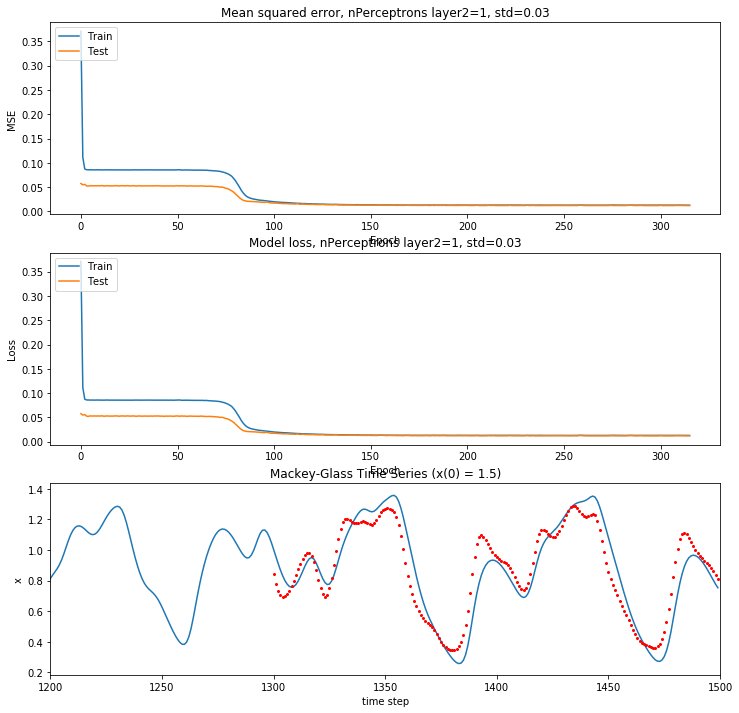

Nodes hidden layer1:  5
Nodes hidden layer2:  2
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Epoch 00285: early stopping
MSE training: 0.012986757
MSE val: 0.012169033288955688


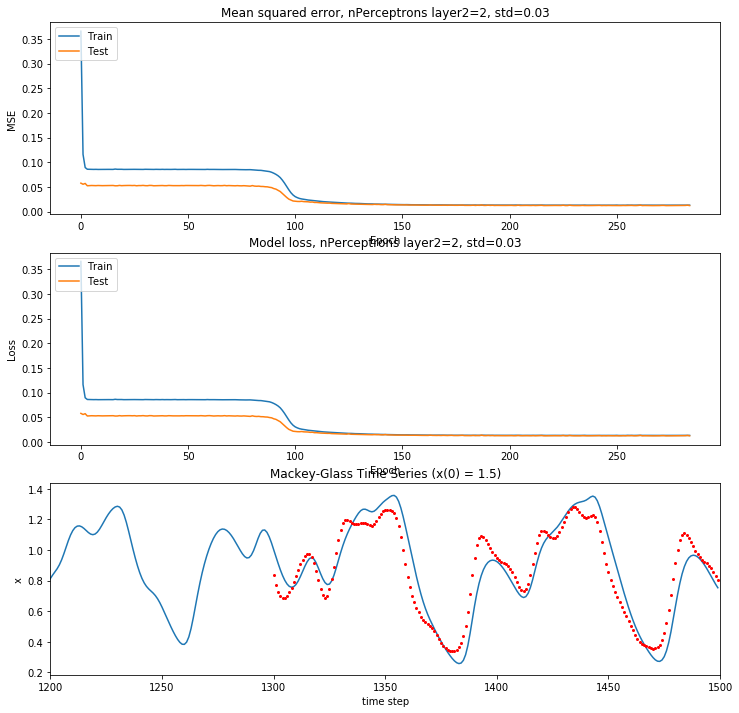

Nodes hidden layer1:  5
Nodes hidden layer2:  3
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343745
MSE val: 0.907838761806488


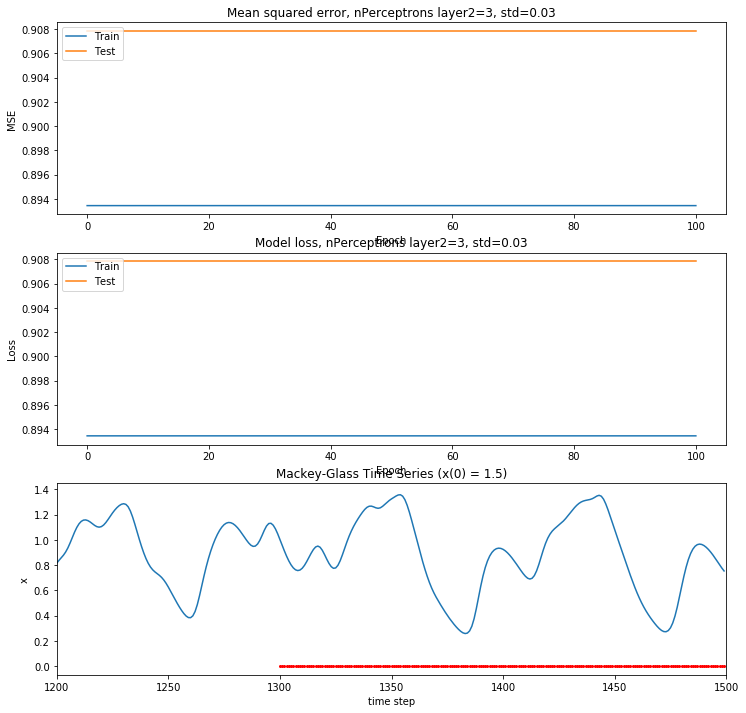

Nodes hidden layer1:  5
Nodes hidden layer2:  4
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343756
MSE val: 0.907838761806488


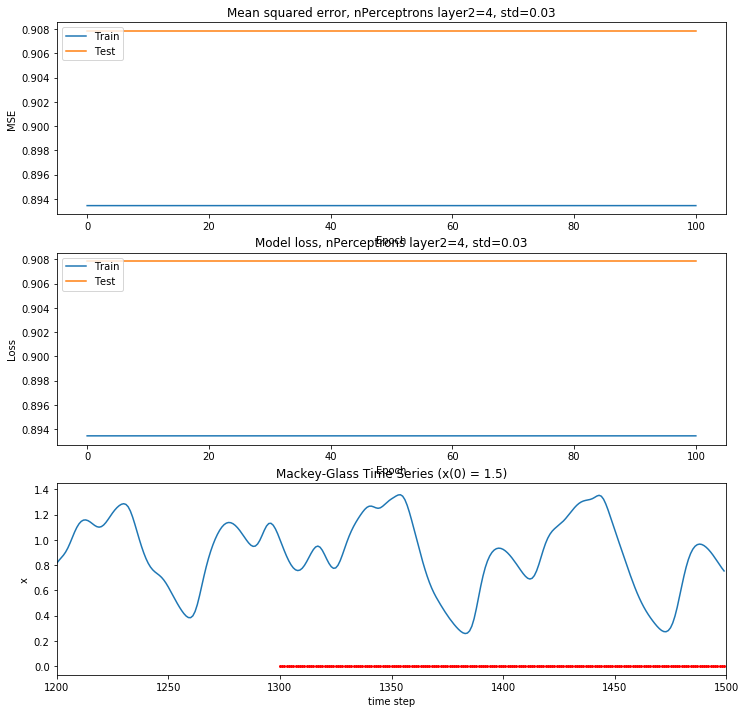

Nodes hidden layer1:  5
Nodes hidden layer2:  5
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 00307: early stopping
MSE training: 0.0031307293
MSE val: 0.0031961482018232346


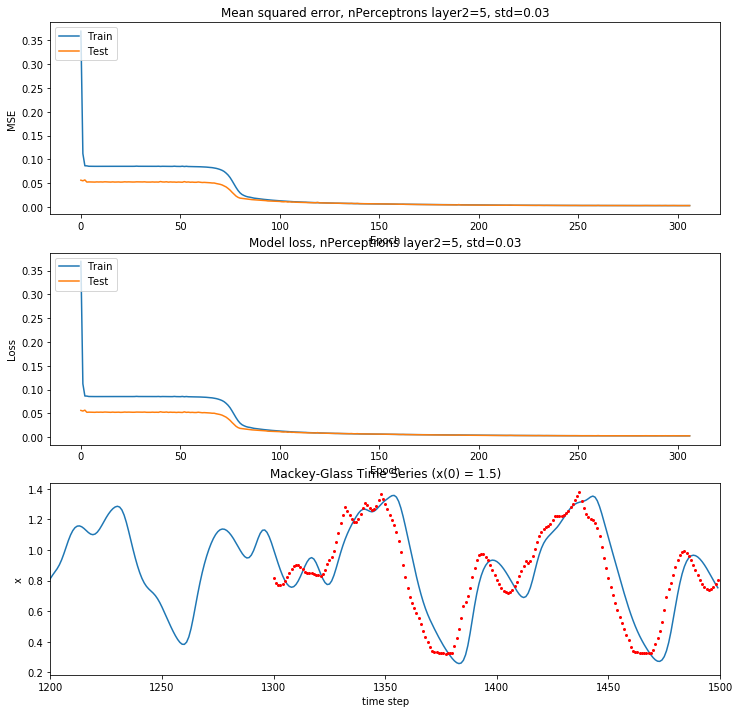

Nodes hidden layer1:  5
Nodes hidden layer2:  6
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 00439: early stopping
MSE training: 0.002889598
MSE val: 0.0029958777595311403


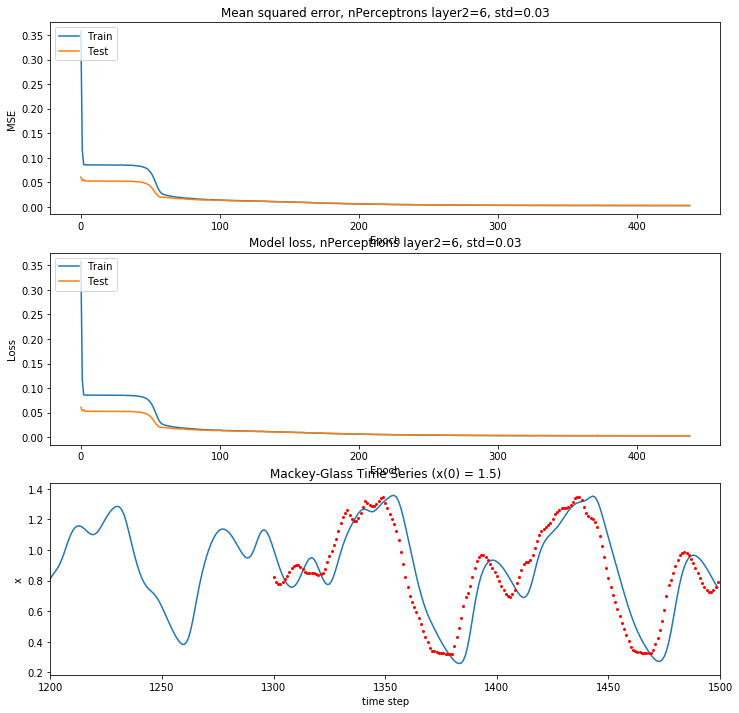

Nodes hidden layer1:  5
Nodes hidden layer2:  7
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 00339: early stopping
MSE training: 0.0029948165
MSE val: 0.0031463559716939926


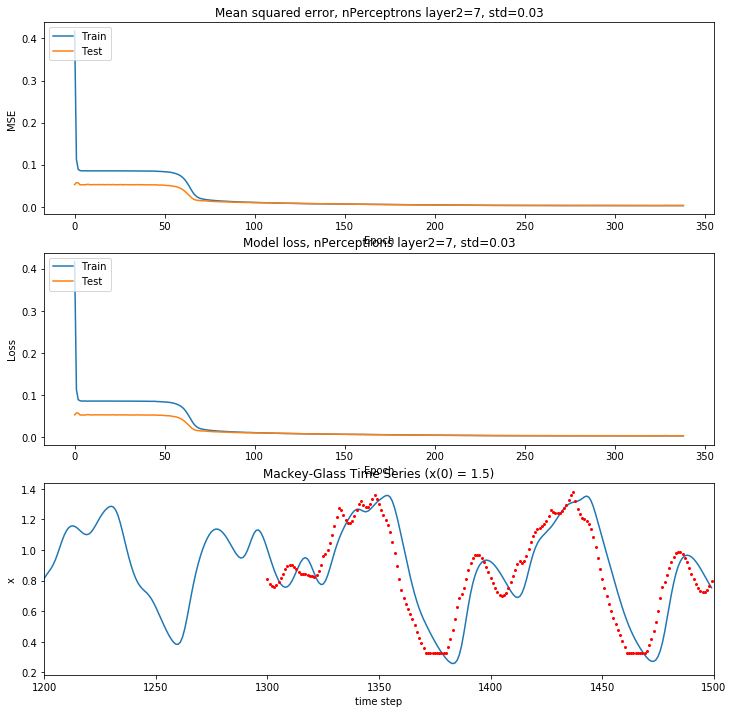

Nodes hidden layer1:  5
Nodes hidden layer2:  8
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
Epoch 00105: early stopping
MSE training: 0.08574126
MSE val: 0.05255674198269844


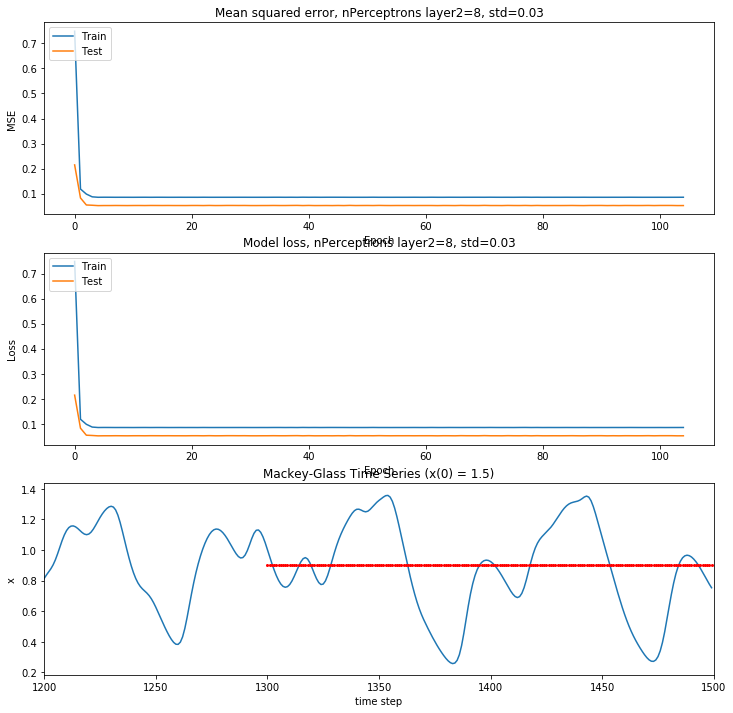

Nodes hidden layer1:  5
Nodes hidden layer2:  1
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343745
MSE val: 0.907838761806488


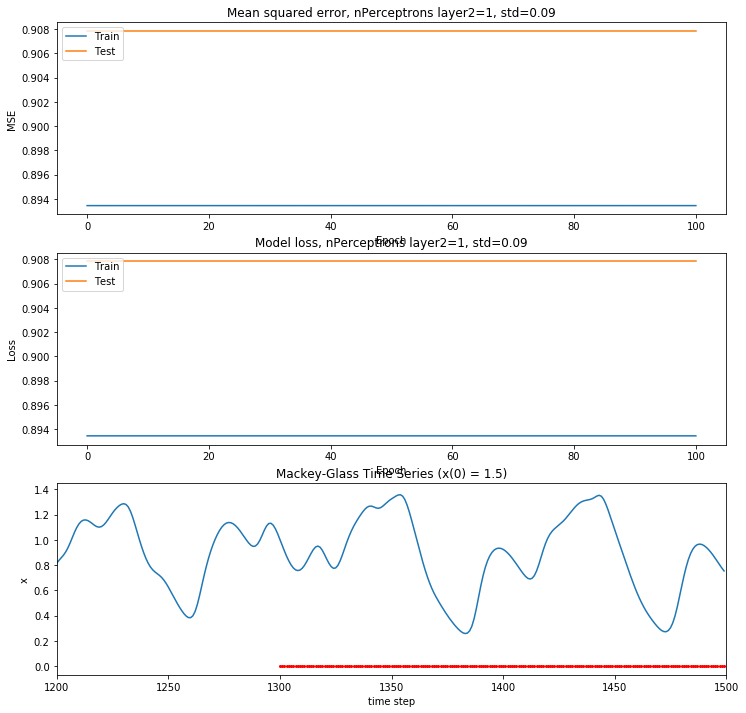

Nodes hidden layer1:  5
Nodes hidden layer2:  2
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934375
MSE val: 0.907838761806488


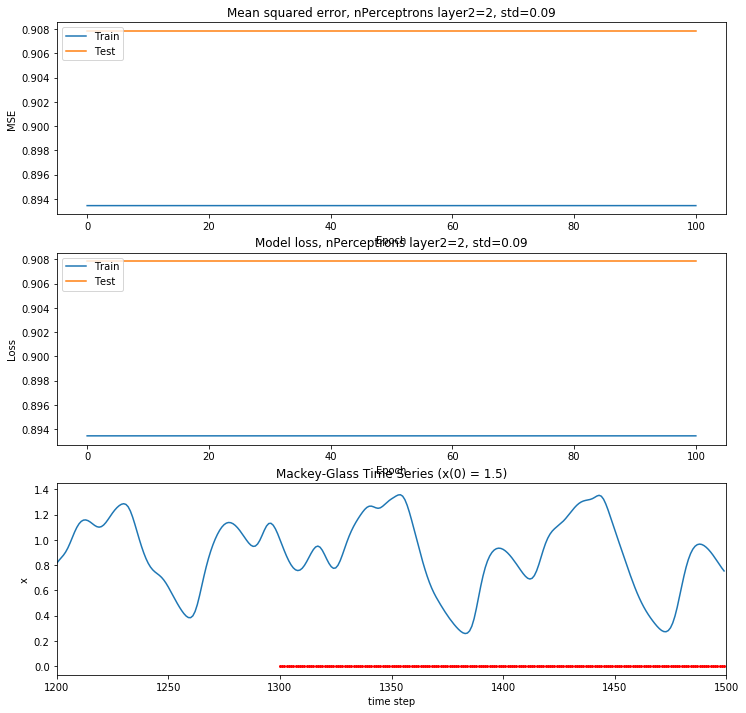

Nodes hidden layer1:  5
Nodes hidden layer2:  3
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343756
MSE val: 0.907838761806488


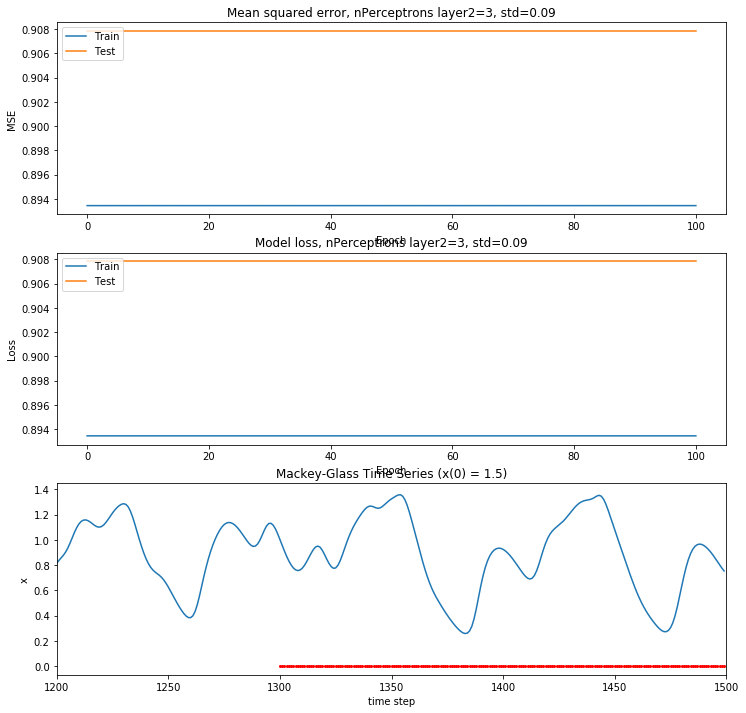

Nodes hidden layer1:  5
Nodes hidden layer2:  4
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Epoch 00336: early stopping
MSE training: 0.011761516
MSE val: 0.012170769274234772


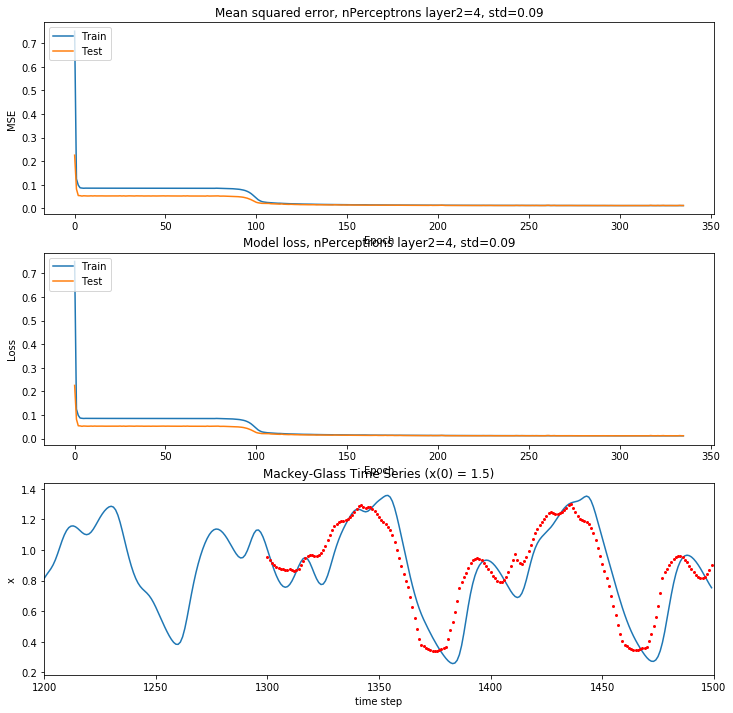

Nodes hidden layer1:  5
Nodes hidden layer2:  5
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343745
MSE val: 0.907838761806488


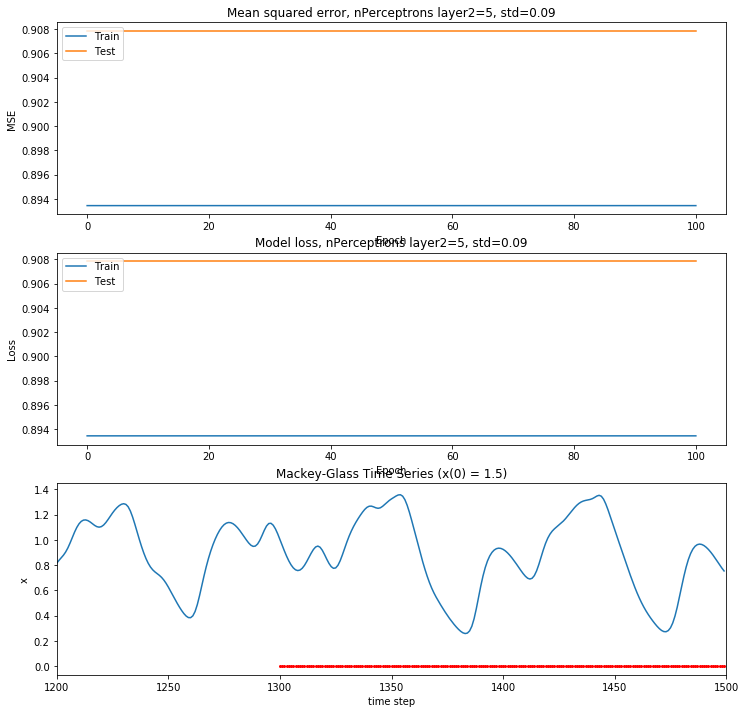

Nodes hidden layer1:  5
Nodes hidden layer2:  6
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 00227: early stopping
MSE training: 0.023523098
MSE val: 0.020608767867088318


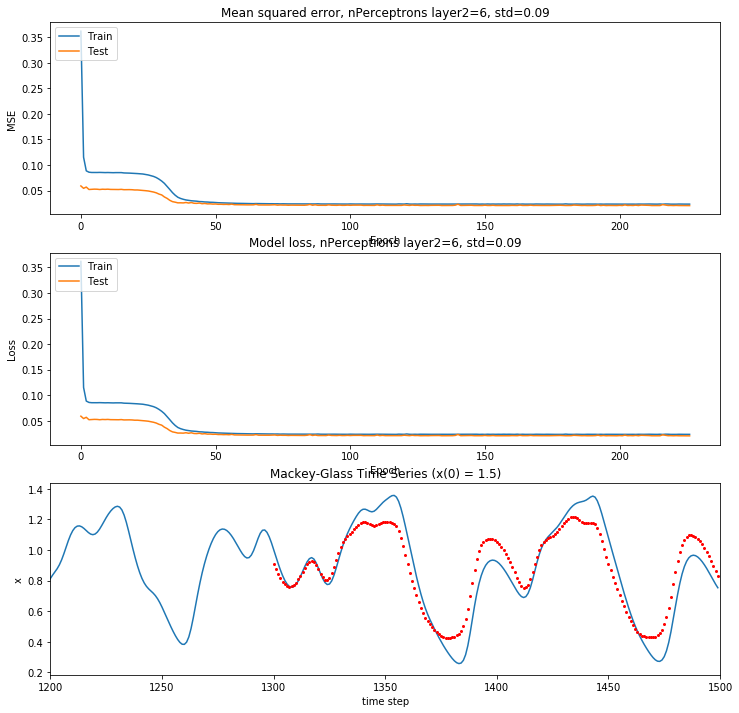

Nodes hidden layer1:  5
Nodes hidden layer2:  7
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934375
MSE val: 0.907838761806488


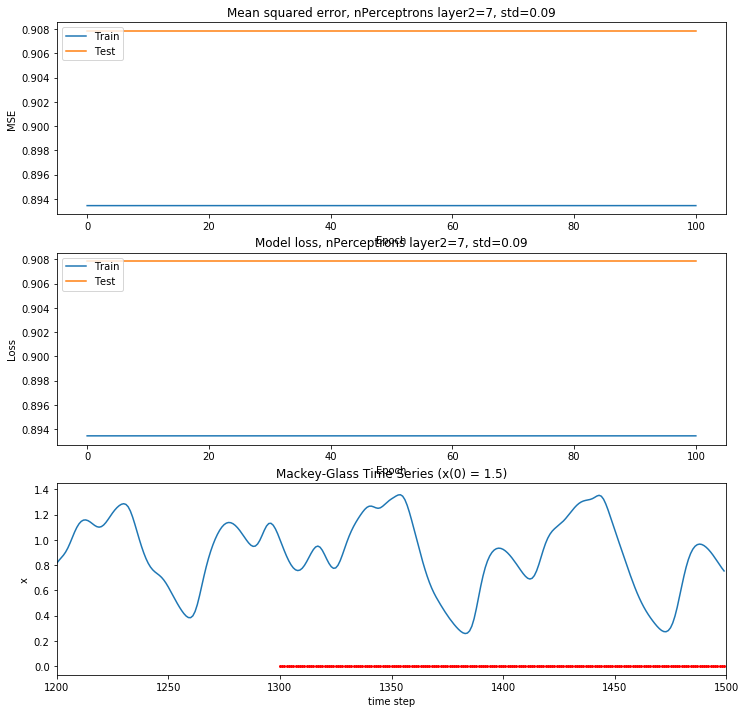

Nodes hidden layer1:  5
Nodes hidden layer2:  8
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
Epoch 00366: early stopping
MSE training: 0.012546526
MSE val: 0.013113362714648247


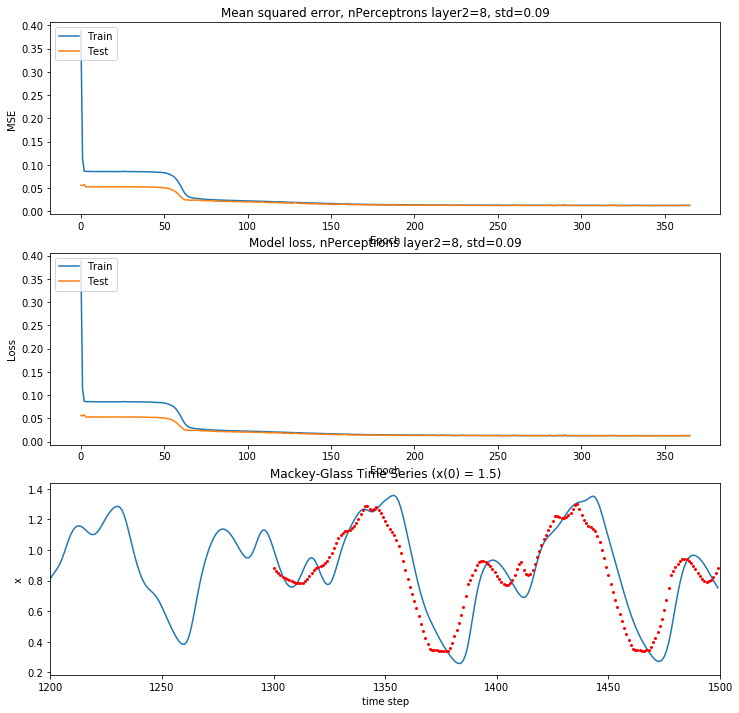

Nodes hidden layer1:  5
Nodes hidden layer2:  1
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
Epoch 00147: early stopping
MSE training: 0.033856522
MSE val: 0.030732953920960426


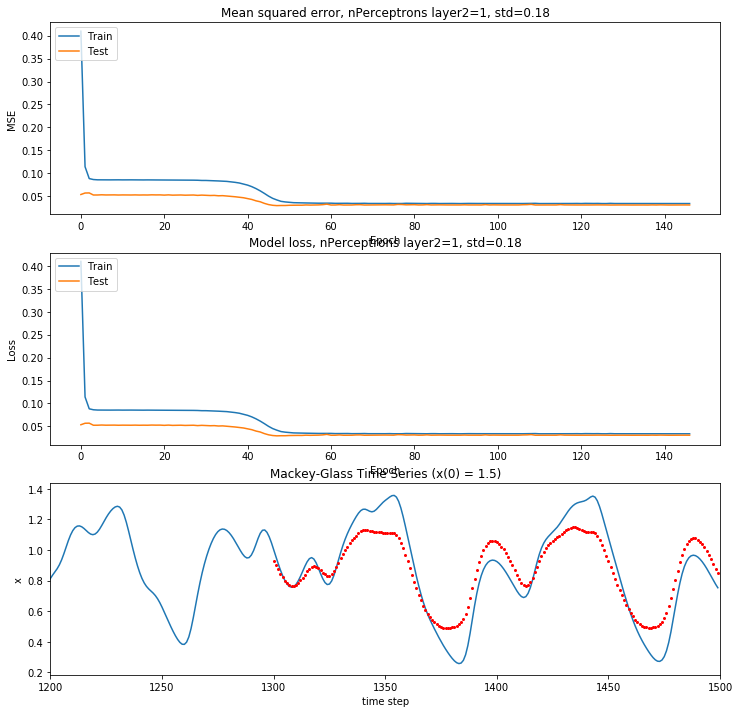

Nodes hidden layer1:  5
Nodes hidden layer2:  2
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Epoch 00175: early stopping
MSE training: 0.033907615
MSE val: 0.030798155814409256


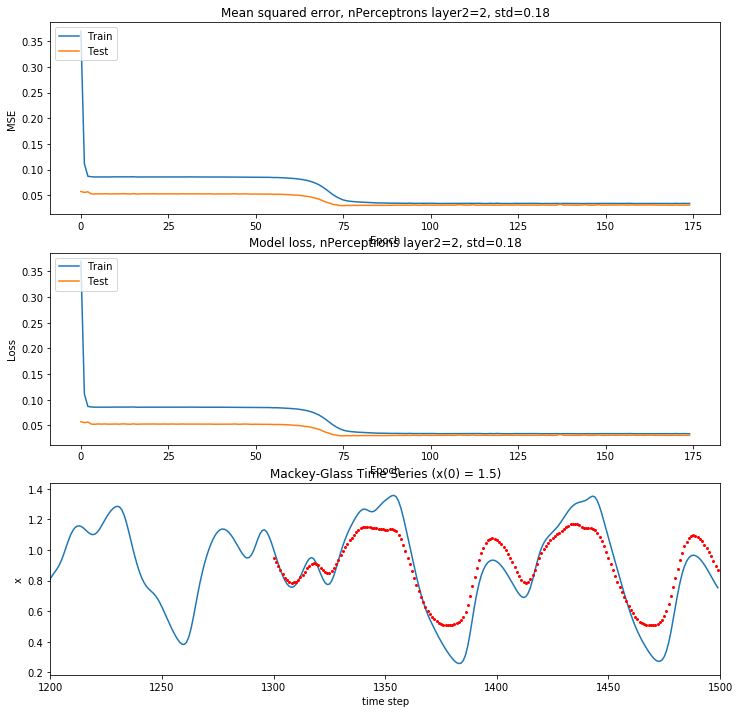

Nodes hidden layer1:  5
Nodes hidden layer2:  3
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 00250: early stopping
MSE training: 0.02482834
MSE val: 0.027551986277103424


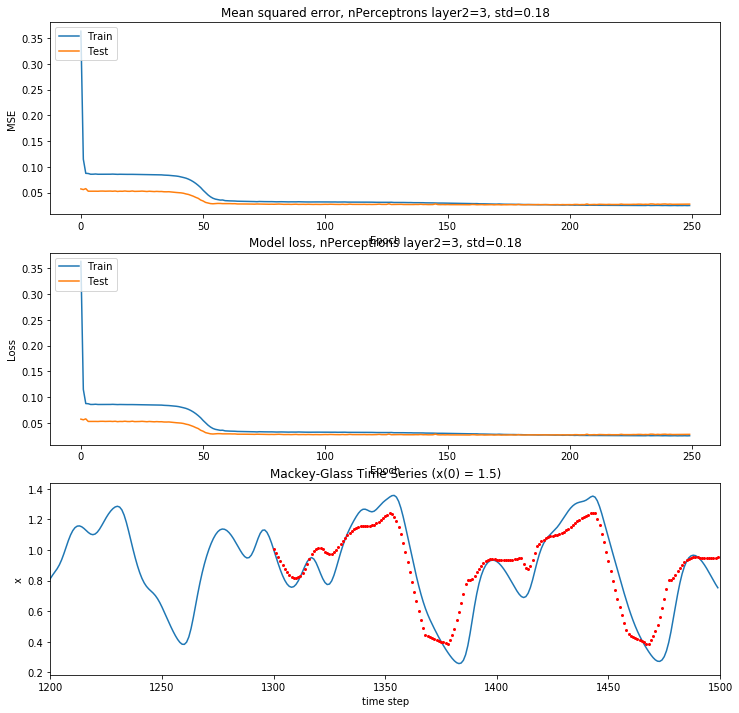

Nodes hidden layer1:  5
Nodes hidden layer2:  4
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Epoch 00254: early stopping
MSE training: 0.024166627
MSE val: 0.02782592736184597


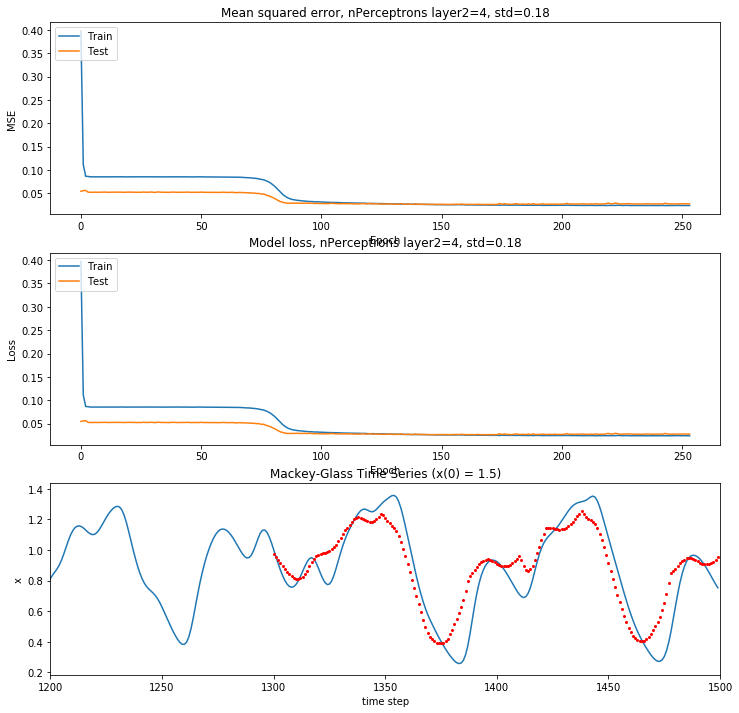

Nodes hidden layer1:  5
Nodes hidden layer2:  5
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 00155: early stopping
MSE training: 0.02514024
MSE val: 0.02636055275797844


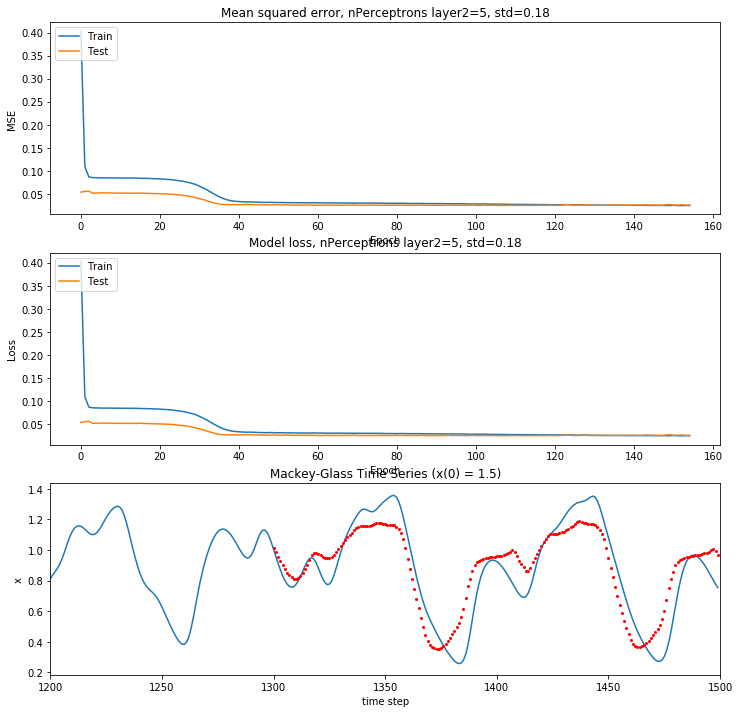

Nodes hidden layer1:  5
Nodes hidden layer2:  6
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 00104: early stopping
MSE training: 0.08526437
MSE val: 0.05297262221574783


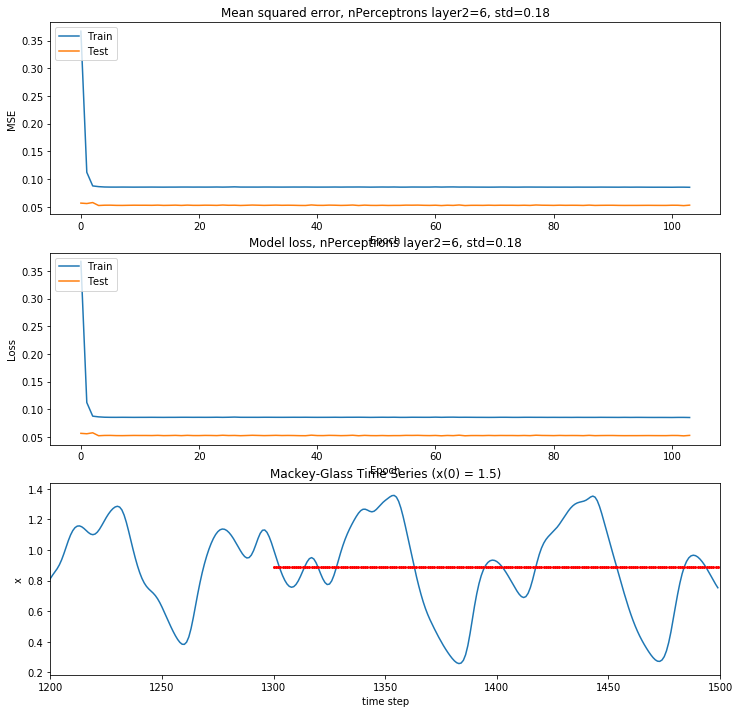

Nodes hidden layer1:  5
Nodes hidden layer2:  7
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343745
MSE val: 0.907838761806488


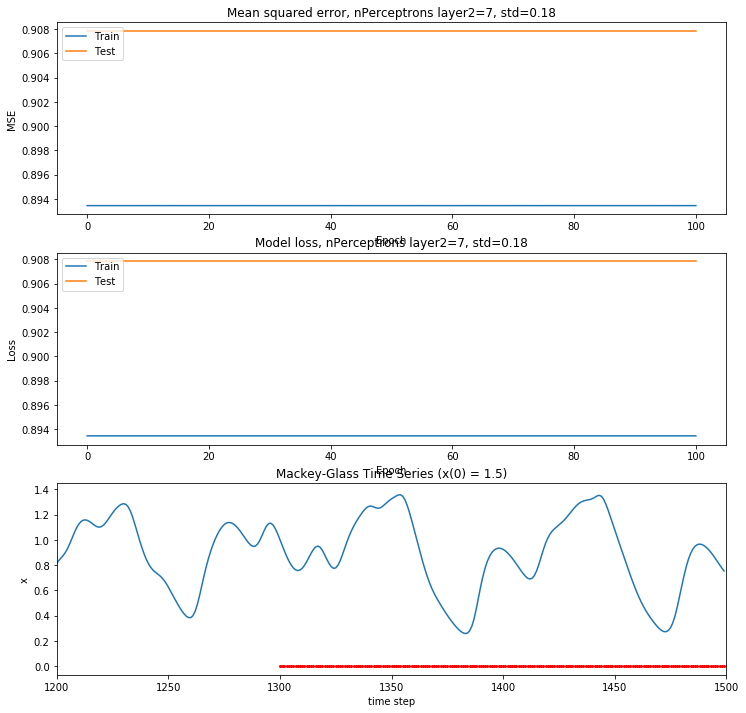

Nodes hidden layer1:  5
Nodes hidden layer2:  8
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.89343756
MSE val: 0.907838761806488


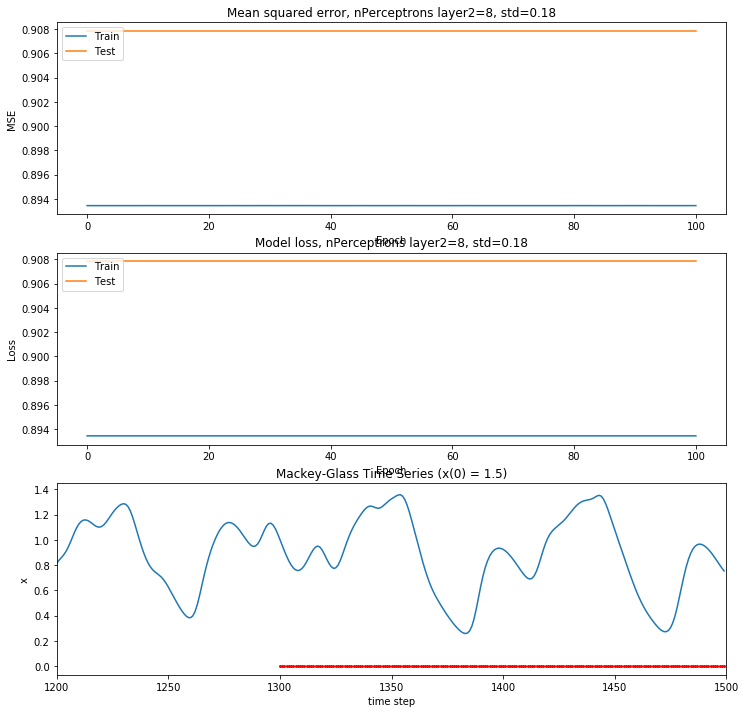

In [34]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))


nodes_first_layer = 5
nodes_second_layer = [1,2,3,4,5,6,7,8]
sigmas = [0.03,0.09,0.18]

elapsed_training_time = []

lamb = 0.0
#lamb = 1e-4

data_mg = mackey_glass_generator()

for std in sigmas:
    train_set, train_labels, test_set, test_labels = get_train_test_data(data_mg,1,std)
    for k in range(len(nodes_second_layer)):
        print("Nodes hidden layer1: ", nodes_first_layer)
        print("Nodes hidden layer2: ", nodes_second_layer[k])
        print("Noise added to training_set with std="+str(std))

        model, early_stopping = init_network([nodes_first_layer,nodes_second_layer[k]],lamb)
        
        start = time.clock()
        history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)
        stop = time.clock()
        
        elapsed_training_time.append(stop-start)
        
        
        predictions = model.predict(test_set, verbose=0)
        print("MSE training:",history.history['MSE'][-1])
        print("MSE val:",history.history['val_MSE'][-1])

        fig = plt.figure(figsize=(12,12))
        ax1 = fig.add_subplot(311)
        ax2 = fig.add_subplot(312)
        ax3 = fig.add_subplot(313)

        # Plot training & validation accuracy valuesa
        ax1.plot(history.history['MSE'])
        ax1.plot(history.history['val_MSE'])
        ax1.set_title('Mean squared error, nPerceptrons layer2='+str(nodes_second_layer[k])+', std='+str(std))
        ax1.set_ylabel('MSE')
        ax1.set_xlabel('Epoch')
        ax1.legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        ax2.plot(history.history['loss'])
        ax2.plot(history.history['val_loss'])
        ax2.set_title('Model loss, nPerceptrons layer2='+str(nodes_second_layer[k])+', std='+str(std))
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epoch')
        ax2.legend(['Train', 'Test'], loc='upper left')

        keras.backend.clear_session()
        t = np.arange(301,len(data_mg)-500)

        ax3.plot(t,data_mg[301:len(data_mg)-500])
        ax3.plot(range(1300,1500),predictions,'ro',markersize=2)
        ax3.set_xlabel("time step")
        ax3.set_ylabel("x")
        ax3.set_title("Mackey-Glass Time Series (x(0) = 1.5)")
        ax3.set_xlim([1200,1500])

        plt.show()

[15.457683999999972, 6.499784999999974, 7.595755000000054, 10.010053999999968, 10.263693999999987, 6.374274000000014, 4.556182000000035, 4.318984999999998]


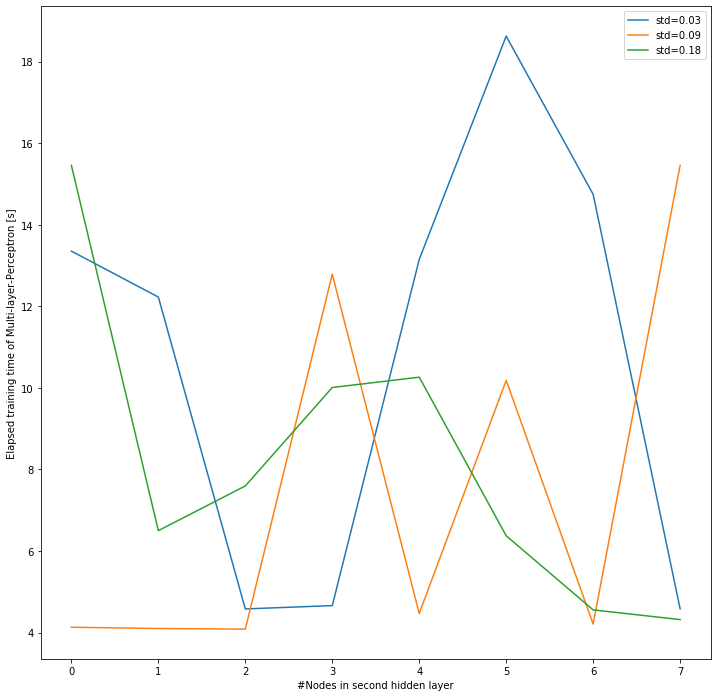

In [35]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

print(elapsed_training_time[15:-1])

ax.plot(np.arange(len(nodes_second_layer)),elapsed_training_time[:8],label='std='+str(sigmas[0]))
ax.plot(np.arange(len(nodes_second_layer)),elapsed_training_time[8:16],label='std='+str(sigmas[1]))
ax.plot(np.arange(len(nodes_second_layer)),elapsed_training_time[15:-1],label='std='+str(sigmas[2]))
ax.set_xlabel('#Nodes in second hidden layer')
ax.set_ylabel('Elapsed training time of Multi-layer-Perceptron [s]')
ax.legend()

plt.show()